In [1]:
# 授權colab存取雲端硬碟
from google.colab import drive
import numpy as np
drive.mount('/content/gdrive') # 需登入googel帳號

# 讀取資料
folder_path = '/content/gdrive/My Drive/Meta-heuristic Algorithm'
with open(folder_path+'/p06_c.txt', 'r') as f:
  bag_capacity = int(f.read())  # 與下方所有函數中的capacity做區隔

with open(folder_path+'/p06_w.txt', 'r') as f:
  weight = np.array(f.read().split())
  weight = list(map(int,weight))

with open(folder_path+'/p06_p.txt', 'r') as f:
  profit = np.array(f.read().split())
  profit = list(map(int,profit))

with open(folder_path+'/p06_s.txt', 'r') as f:
  solution = np.array(f.read().split())
  solution = list(map(int,solution))

# 調整資料格式
item = np.dstack((weight,profit)) # 將weight與profit合併並與下方所有函數中的items做區隔
item = np.reshape(item,(-1,2)) #  調整合併後的三維矩陣至二維


Mounted at /content/gdrive


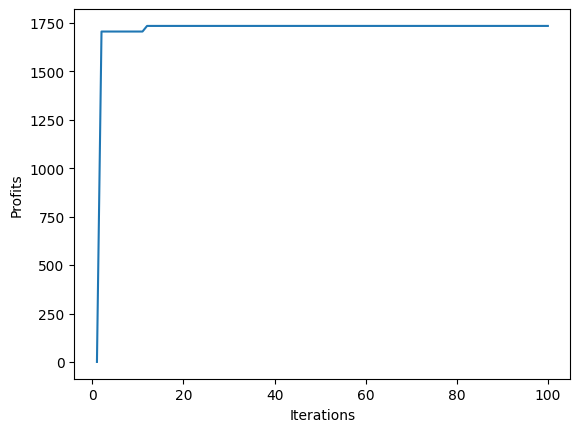

最優解的物品組合: [0, 1, 0, 1, 0, 0, 1]
總利潤: 1735
correct


In [3]:
# Hill climbing
import random
import matplotlib.pyplot as plt

# 迭代次數
iterations = 100

# 評估函數
def total_profit(selected_items, items, capacity):
    total_weight = 0
    total_profit = 0
    for i in range(len(items)):
        if selected_items[i] == 1:
            total_weight += items[i][0]
            total_profit += items[i][1]
    if total_weight > capacity:
        return 0
    return total_profit

# 主要演算法
def hill_climbing(capacity, items, max_iterations):

    # 隨機生成初始解
    best_solution = [random.choice([0, 1]) for i in range(len(items))]

    # 紀錄初始解
    best_profit = total_profit(best_solution, items, capacity)

    # 鄰近解生成
    neighbor = best_solution[:]

    iteration_values = []
    profit_values = []

    for iteration in range(max_iterations):

        # 隨機翻轉鄰近解的其中一個物品選取狀態
        index = random.randint(0, len(items) - 1)
        neighbor[index] = 1 - neighbor[index]
        neighbor_profit = total_profit(neighbor, items, capacity)

        # 選擇最優解,判斷鄰近解是否更好
        if neighbor_profit > best_profit:
            best_solution = neighbor[:]
            best_profit = neighbor_profit

        # 紀錄迭代情況
        profit_values.append(best_profit)

    # 回傳profit_values以方便繪製圖表
    return best_solution, best_profit, profit_values

# 執行Hill Climbing
best_solution, best_profit, profit_values = hill_climbing(bag_capacity, item, iterations)

# 繪製利潤與迭代次數圖表
plt.plot(range(1, iterations + 1), profit_values)
plt.xlabel('Iterations')
plt.ylabel('Profits')
plt.show()

print("最優解的物品組合:", best_solution)
print("總利潤:", best_profit)

if best_solution == solution:
  print('correct')

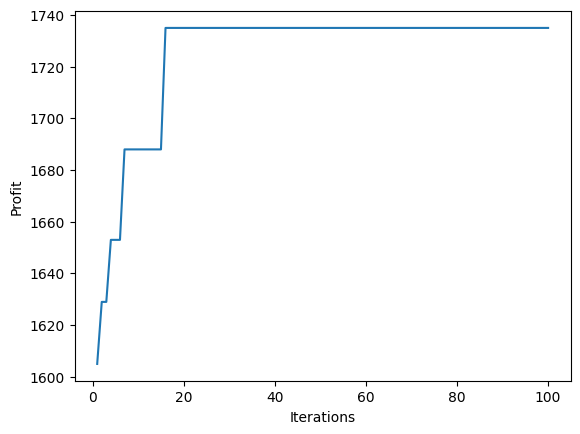

Best Solution: [0, 1, 0, 1, 0, 0, 1]
Best profit: 1735
correct


In [ ]:
# Genetic algorithm
import random
import matplotlib.pyplot as plt

# 基因演算法參數
population_size = 15
mutation_rate = 0.1
generations = 100

# 適應度函數
def total_profit(selected_items, items, capacity):
    total_weight = 0
    total_profit = 0
    for i in range(len(items)):
        if selected_items[i] == 1:
            total_weight += items[i][0]
            total_profit += items[i][1]
    if total_weight > capacity:
        return 0
    return total_profit

# 初始化群體
def initialize_population(items):
    population = []
    for i in range(population_size):
        individual = [random.choice([0, 1]) for i in range(len(items))]
        population.append(individual)
    return population

# 交叉操作,隨機擷取兩父代部分做交叉
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# 突變操作,透過調整mutation_rate可控制突變機率(%)
def mutate(child):
    for i in range(len(child)):
        if random.random() < mutation_rate:
            child[i] = 1 - child[i]
    return child

# 主要演算法
def genetic_algorithm(items, capacity):
    population = initialize_population(items) # 初始化群體
    profit_value = [] # 紀錄迭代情況以方便繪圖
    for i in range(generations):
        population = sorted(population, key=lambda x: total_profit(x, items, capacity), reverse=True)  #  以totail_profit做大到小排序
        next_generation = population[:population_size//2]  # 保留profit較大的半邊作為父代

        # 隨機取兩父代交叉與子代突變
        while len(next_generation) < population_size:
            parent1, parent2 = random.choices(population[:population_size//2], k=2)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            next_generation.extend([child1, child2])

        # 將子代取代掉原population中profit較小的半邊
        population = next_generation

        # 紀錄迭代情況
        profit_value.append(total_profit(max(population, key=lambda x: total_profit(x, items, capacity)), items, capacity)) #從新生成的後代與父代中取出最大profit

    best_solution = max(population, key=lambda x: total_profit(x, items, capacity))
    return best_solution, profit_value

# 執行Genetic Algo
best_solution, profit_value = genetic_algorithm(item, bag_capacity)

# 繪製利潤與迭代次數圖表
plt.plot(range(1, generations + 1), profit_value)
plt.xlabel('Iterations')
plt.ylabel('Profit')
plt.show()

print("Best Solution:", best_solution)
print("Best profit:", profit_value[-1])

if best_solution == solution:
  print('correct')